## 1.Read the tips dataset from the provided source only. Handle the missing values with the appropriate techniques.

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('tips.csv')

In [10]:
print("The null details in the given file is")
df.isnull().sum()

The null details in the given file is


Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

### Mean,Mode,Median To handle missing values

In [14]:
df = pd.read_csv('tips.csv',usecols=['total_bill','tip','size'])

In [16]:
df.isnull().mean()

total_bill    0.159836
tip           0.000000
size          0.000000
dtype: float64

In [17]:
def impute_nan(df, variable, method):
    df[variable+'_median'] = df[variable].fillna(method)

In [19]:
method = df.tip.median() 
method

2.9

In [20]:
impute_nan(df,'total_bill',method)

In [21]:
df.head()

,total_bill,tip,size,total_bill_median
0,16.99,1.01,2,16.99
1,NaN,1.66,3,2.90
2,21.01,3.50,3,21.01
3,23.68,3.31,2,23.68
4,24.59,3.61,4,24.59


## 2. Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.

In [4]:
import pandas as ps

In [1]:
import sklearn

In [5]:
df = ps.read_csv("tips.csv")

## Using Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

label1 = LabelEncoder()
df['sex'] = label1.fit_transform(df['sex'])
df['smoker'] = label1.fit_transform(df['smoker'])
df['day'] = label1.fit_transform(df['day'])
df['time'] = label1.fit_transform(df['time'])
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,0,0,2,0,2
1,1,NaN,1.66,1,0,2,0,3
2,2,21.01,3.50,1,0,2,0,3
3,3,23.68,3.31,1,0,2,0,2
4,4,24.59,3.61,0,0,2,0,4


## Using One Hot Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
categorical_columns = ['sex', 'smoker', 'day', 'time']


encoder = OneHotEncoder()


encoder.fit(df[categorical_columns])

onehot_encoded = encoder.transform(df[categorical_columns])


onehot_encoded_df = ps.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))


final_df = ps.concat([df.drop(columns=categorical_columns), onehot_encoded_df], axis=1)
final_df

,Unnamed: 0,total_bill,tip,size,sex_0,sex_1,smoker_0,smoker_1,day_0,day_1,day_2,day_3,time_0,time_1
0,0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,NaN,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Using Ordinal Encoding

In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df['sex'] = enc.fit_transform(df[['sex']])
df['smoker'] = enc.fit_transform(df[['smoker']])
df['day'] = enc.fit_transform(df[['day']])
df['time'] = enc.fit_transform(df[['time']])
df['size'] = enc.fit_transform(df[['size']])
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,0.0,0.0,2.0,0.0,1.0
1,1,NaN,1.66,1.0,0.0,2.0,0.0,2.0
2,2,21.01,3.50,1.0,0.0,2.0,0.0,2.0
3,3,23.68,3.31,1.0,0.0,2.0,0.0,1.0
4,4,24.59,3.61,0.0,0.0,2.0,0.0,3.0


## 3. Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.

### standardization

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [16]:
df1 = scaler.transform(df)
df1

array([[0.        , 0.29157939, 0.00111111, ..., 0.66666667, 0.        ,
        0.2       ],
       [0.00411523,        nan, 0.07333333, ..., 0.66666667, 0.        ,
        0.4       ],
       [0.00823045, 0.3757855 , 0.27777778, ..., 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.99176955, 0.41055718, 0.11111111, ..., 0.33333333, 0.        ,
        0.2       ],
       [0.99588477, 0.30896523, 0.08333333, ..., 0.33333333, 0.        ,
        0.2       ],
       [1.        , 0.32907415, 0.22222222, ..., 1.        , 0.        ,
        0.2       ]])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 1.,  6., 10.,  0., 24., 37., 28., 23., 18., 13., 10.,  9.,  5.,
         7.,  3.,  4.,  1.,  2.,  3.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

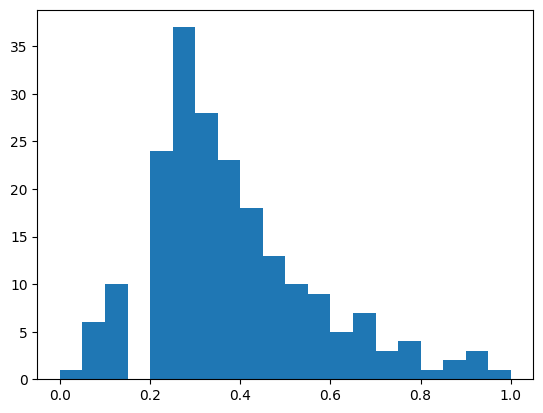

In [20]:
plt.hist(df1[:,1], bins = 20)

### MIN MAX Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = ps.DataFrame(min_max.fit_transform(df), columns= df.columns)
df_minmax.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0.000000,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.004115,NaN,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.008230,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.012346,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.016461,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6


(array([15., 26., 55., 24., 41., 25., 20.,  7., 13.,  6.,  4.,  1.,  4.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

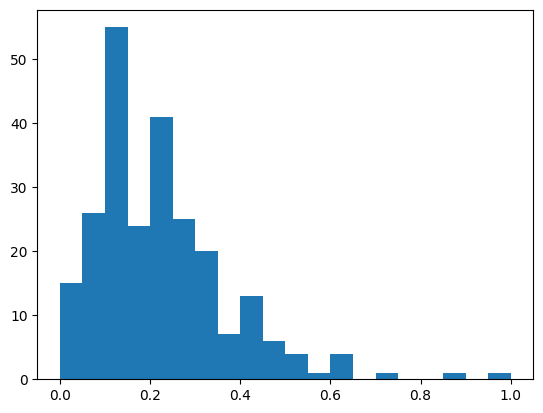

In [23]:
plt.hist(df_minmax['tip'], bins = 20)

## 4.Create a new feature representing the average tip percentage for each dining party size.

In [24]:
final_df['tip_percentage'] = (final_df['tip'] / final_df['total_bill']) * 100
final_df.head()

,Unnamed: 0,total_bill,tip,size,sex_0,sex_1,smoker_0,smoker_1,day_0,day_1,day_2,day_3,time_0,time_1,tip_percentage
0,0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.944673
1,1,NaN,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN
2,2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.658734
3,3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.978041
4,4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14.680765


## 5.Create a new feature based on total bill and tips if total bill is greater than 10 dollars and tips is greater than 3 dollars mark as Highest-bills-with-tips otherwise Normal-bills

In [25]:
import pandas as pd
final_df['bill_type'] = 'Normal-bills'
final_df.loc[(final_df['total_bill'] > 10) & (final_df['tip'] > 3), 'bill_type'] = 'Highest-bills-with-tips'
final_df.head()

,Unnamed: 0,total_bill,tip,size,sex_0,sex_1,smoker_0,smoker_1,day_0,day_1,day_2,day_3,time_0,time_1,tip_percentage,bill_type
0,0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.944673,Normal-bills
1,1,NaN,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,Normal-bills
2,2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.658734,Highest-bills-with-tips
3,3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.978041,Highest-bills-with-tips
4,4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14.680765,Highest-bills-with-tips
